In [91]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
df_greenbuildings = pd.read_csv('greenbuildings.csv') #Reading the data

In [6]:
df_greenbuildings.head() #First 5 rows

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,class_b,LEED,Energystar,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,0,0,1,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,1,0,0,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,0,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [7]:
df_greenbuildings['green_rating'].value_counts() #Green and non-geen building distribution

green_rating
0    7209
1     685
Name: count, dtype: int64

#### Insights from stats-guru
I began by cleaning the data a little bit. In particular, I noticed that a handful of the buildings in the data set had very low occupancy rates (less than 10% of available space occupied). I decided to remove these buildings from consideration, on the theory that these buildings might have something weird going on with them, and could potentially distort the analysis. Once I scrubbed these low-occupancy buildings from the data set, I looked at the green buildings and non-green buildings separately. The median market rent in the non-green buildings was $25 per square foot per year, while the median market rent in the green buildings was \\$27.60 per square foot per year: about \\$2.60 more per square foot. (I used the median rather than the mean, because there were still some outliers in the data, and the median is a lot more robust to outliers.) Because our building would be 250,000 square feet, this would translate into an additional \\$250000 x 2.6 = \\$650000 of extra revenue per year if we build the green building.

Our expected baseline construction costs are \\$100 million, with a 5% expected premium for green certification. Thus we should expect to spend an extra \\$5 million on the green building. Based on the extra revenue we would make, we would recuperate these costs in \\$5000000/650000 = 7.7 years. Even if our occupancy rate were only 90%, we would still recuperate the costs in a little over 8 years. Thus from year 9 onwards, we would be making an extra \\$650,000 per year in profit. Since the building will be earning rents for 30 years or more, it seems like a good financial move to build the green building.

#### Let's test each of the assumptions made by stats-guru to arrive at the decision to move ahead with the green building 

In [11]:
# Buildings with less than 10% occupancy were excluded. Let's explore the distribution of the occupancy rates 
df_greenbuildings['leasing_rate'].describe()

count    7894.000000
mean       82.606371
std        21.380315
min         0.000000
25%        77.850000
50%        89.530000
75%        96.440000
max       100.000000
Name: leasing_rate, dtype: float64

In [14]:
df_greenbuildings[df_greenbuildings['leasing_rate'] < 10]['green_rating'].value_counts()

green_rating
0    214
1      1
Name: count, dtype: int64

In [15]:
df_greenbuildings.groupby('green_rating')['leasing_rate'].mean()

green_rating
0    81.972061
1    89.281898
Name: leasing_rate, dtype: float64

In [16]:
df_greenbuildings[df_greenbuildings['leasing_rate'] < 10]['age'].describe()

count    215.000000
mean      54.418605
std       32.674430
min        0.000000
25%       28.000000
50%       57.000000
75%       85.000000
max      118.000000
Name: age, dtype: float64

In [17]:
df_greenbuildings[df_greenbuildings['leasing_rate'] >= 10]['age'].describe()

count    7679.000000
mean       47.043105
std        32.159979
min         0.000000
25%        23.000000
50%        34.000000
75%        79.000000
max       187.000000
Name: age, dtype: float64

<Axes: xlabel='leasing_rate'>

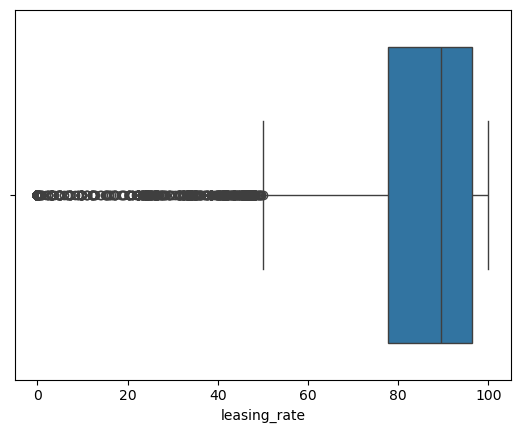

In [20]:
sns.boxplot(data=df_greenbuildings, x='leasing_rate') # checking extreme values with boxplot

- The boxplot shows a strong concentration of outliers for leasing rate. So removing the buildings with less than 10% occupancy makes sense. 
- There were 215 buildings with less than 10% occupancy rate. And among those there was only 1 green rated building

In [21]:
df_greenbuildings = df_greenbuildings[df_greenbuildings['leasing_rate'] >= 10]

#### Next we need to test the hypothesis about the median market rent for green and non-green buildings

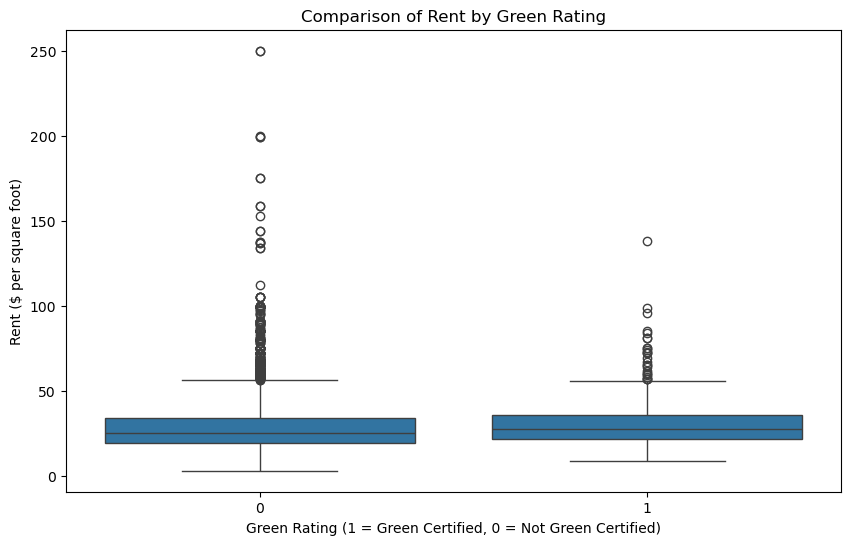

In [23]:
# Compare rent distributions by green rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='green_rating', y='Rent', data=df_greenbuildings)
plt.title('Comparison of Rent by Green Rating')
plt.xlabel('Green Rating (1 = Green Certified, 0 = Not Green Certified)')
plt.ylabel('Rent ($ per square foot)')
plt.show()

#### The stats guru's insight about the difference in Rent for green and non-green buildings makes sense. The distribution of rent is skewed and so it makes sense to consider median Rent.

In [87]:
df_greenbuildings.groupby('green_rating').agg({'size':['mean','median'],
                                              'empl_gr':['mean','median'],
                                              'Rent':['mean','median'],
                                              'leasing_rate':['mean','median'],
                                              'stories':['mean','median'],
                                              'age':['mean','median'],
                                              'cd_total_07':['mean','median'],
                                              'hd_total07':['mean','median'],
                                              'total_dd_07':['mean','median'],
                                              'Precipitation':['mean','median'],
                                              'Gas_Costs':['mean','median'],
                                              'Electricity_Costs':['mean','median']}).reset_index() #Checking green rating with other features

green_rating           size             empl_gr              Rent         \
                         mean    median      mean median       mean median   
0            0  231007.177984  123250.0  3.156511   1.97  28.444779  25.03   
1            1  325965.169591  241199.0  3.506032   2.38  30.028480  27.60   

  leasing_rate            stories               age         cd_total_07  \
          mean  median       mean median       mean median         mean   
0    84.440520  89.650  13.681630   10.0  49.308077   36.0  1196.692352   
1    89.412427  92.925  15.346491   11.0  23.880117   22.0  1423.070175   

           hd_total07          total_dd_07         Precipitation         \
  median         mean  median         mean  median          mean median   
0  966.0  3503.305933  2739.0  4699.998284  4979.0     31.288031  23.16   
1  906.5  2794.815789  1670.0  4217.885965  4416.0     29.199474  22.71   

  Gas_Costs           Electricity_Costs            
       mean    median              mean    median  
0  0.011352  0.010296          0.030893  0.032737  
1  0.011096  0.010300          0.031586  0.034100

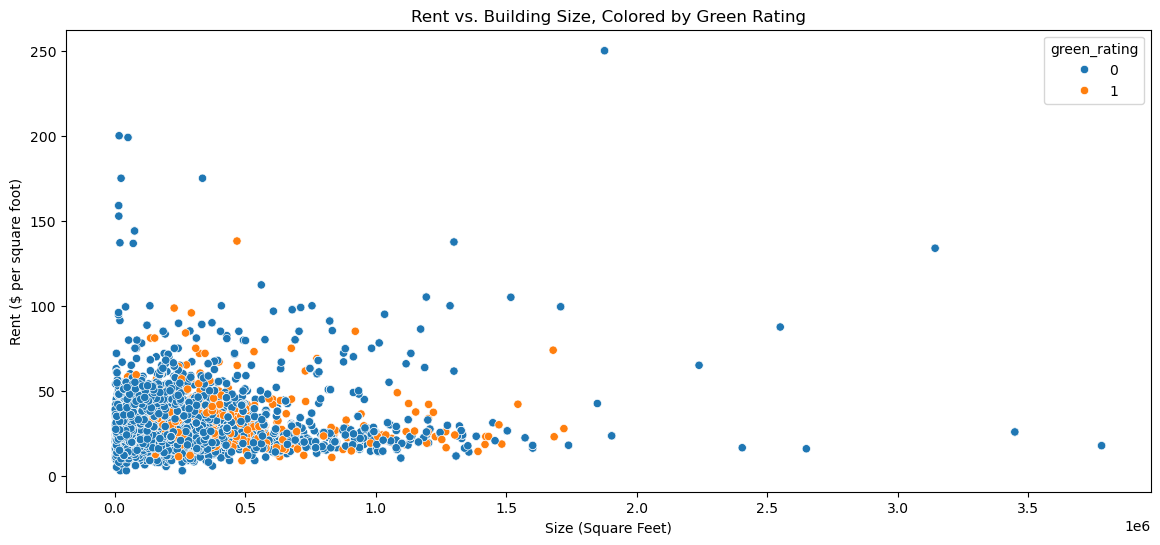

In [37]:
# Explore potential confounding variables (e.g., size, class)
plt.figure(figsize=(14, 6))
sns.scatterplot(x='size', y='Rent', hue='green_rating', data=df_greenbuildings)
plt.title('Rent vs. Building Size, Colored by Green Rating')
plt.xlabel('Size (Square Feet)')
plt.ylabel('Rent ($ per square foot)')
plt.show()

#### Based on the scatterplot above, we can infer that size doesn't have any significant impact on the rent of the building

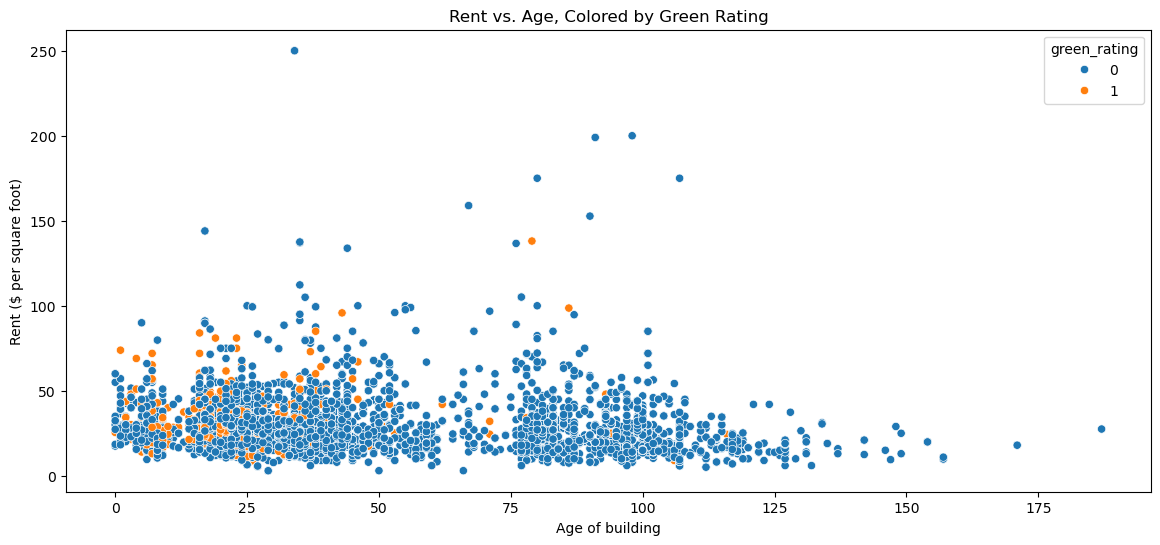

In [41]:
# Explore potential confounding variables (e.g., size, class)
plt.figure(figsize=(14, 6))
sns.scatterplot(x='age', y='Rent', hue='green_rating', data=df_greenbuildings)
plt.title('Rent vs. Age, Colored by Green Rating')
plt.xlabel('Age of building')
plt.ylabel('Rent ($ per square foot)')
plt.show()

#### Green rates buildings are built more recently than non-green buildings. Age of the building seems to have a slight negative relationship with rent

### Now let's explore the impact of quality of buildings (Class A, class B) on the rent overlayed with green rating

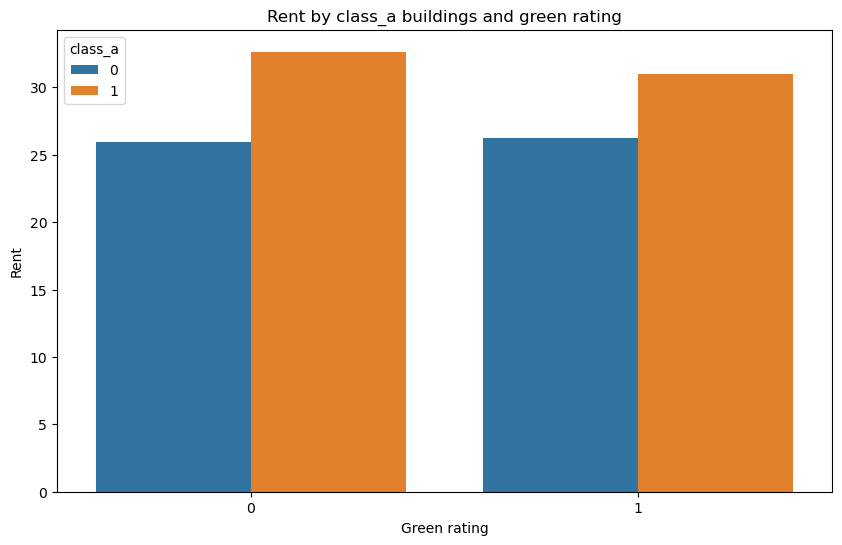

In [101]:
# Class A
plt.figure(figsize=(10, 6))
#sns.boxplot(x='green_rating', y='Rent', hue='class_a', data=df_greenbuildings)
sns.barplot(x='green_rating', y='Rent', hue='class_a', data=df_greenbuildings, errorbar=None)
plt.title('Rent by class_a buildings and green rating')
plt.xlabel('Green rating')
plt.ylabel('Rent')
plt.show()

#### Class A buildings seem to have higher Rent than other buildings irrespective of green rating

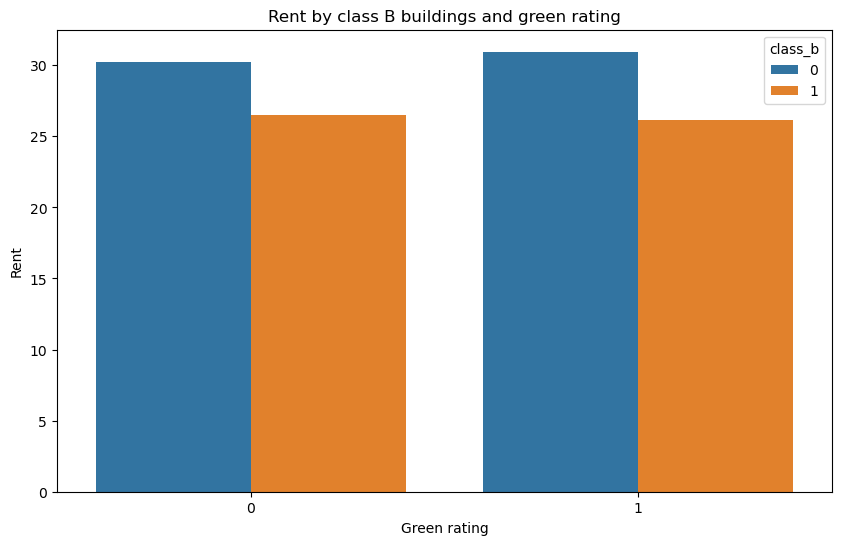

In [100]:
# Class B
plt.figure(figsize=(10, 6))
sns.barplot(x='green_rating', y='Rent', hue='class_b', data=df_greenbuildings, errorbar=None)
plt.title('Rent by class B buildings and green rating')
plt.xlabel('Green rating')
plt.ylabel('Rent')
plt.show()

#### Class B buildings tend to have lower Rent than the others irrespective of Green rating

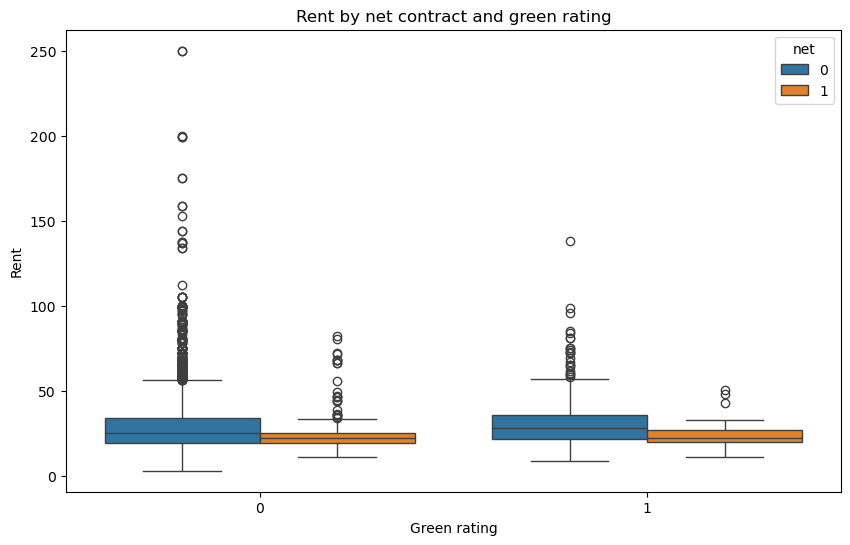

In [99]:
# Impact of net contract on the Rent overlayed by green rating
# Class B
plt.figure(figsize=(10, 6))
sns.boxplot(x='green_rating', y='Rent', hue='net', data=df_greenbuildings)
plt.title('Rent by net contract and green rating')
plt.xlabel('Green rating')
plt.ylabel('Rent')
plt.show()

#### That makes sense. Building with net rental contracts have low Rents than others

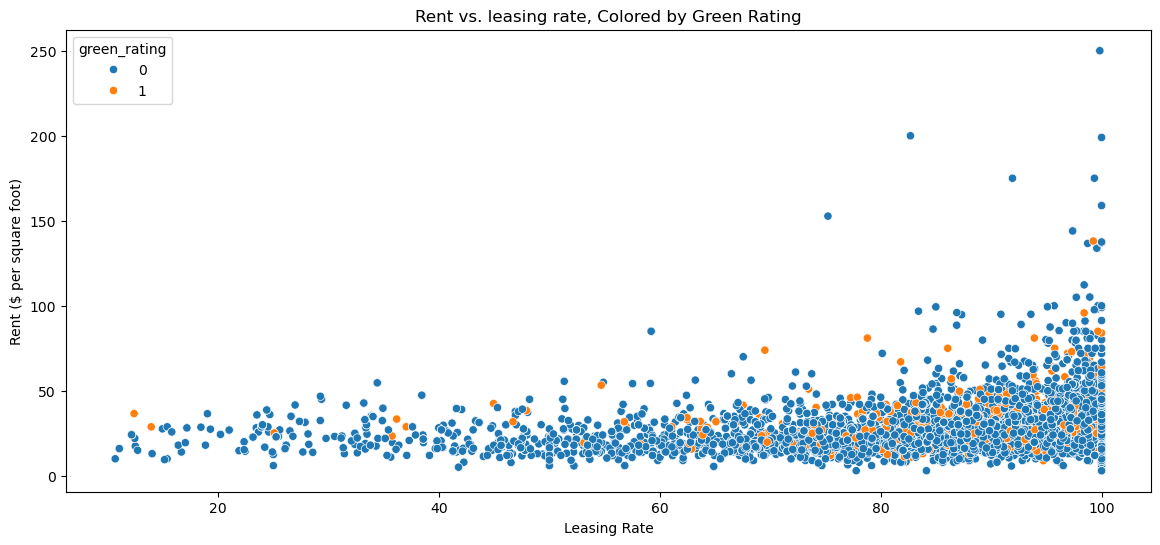

In [72]:
# Relation between leasing rate and Rent along with green rating
plt.figure(figsize=(14, 6))
sns.scatterplot(x='leasing_rate', y='Rent', hue='green_rating', data=df_greenbuildings)
plt.title('Rent vs. leasing rate, Colored by Green Rating')
plt.xlabel('Leasing Rate')
plt.ylabel('Rent ($ per square foot)')
plt.show()

#### There seems to be a slight positive relationship between leasing rate and Rent for both green and non-green properties

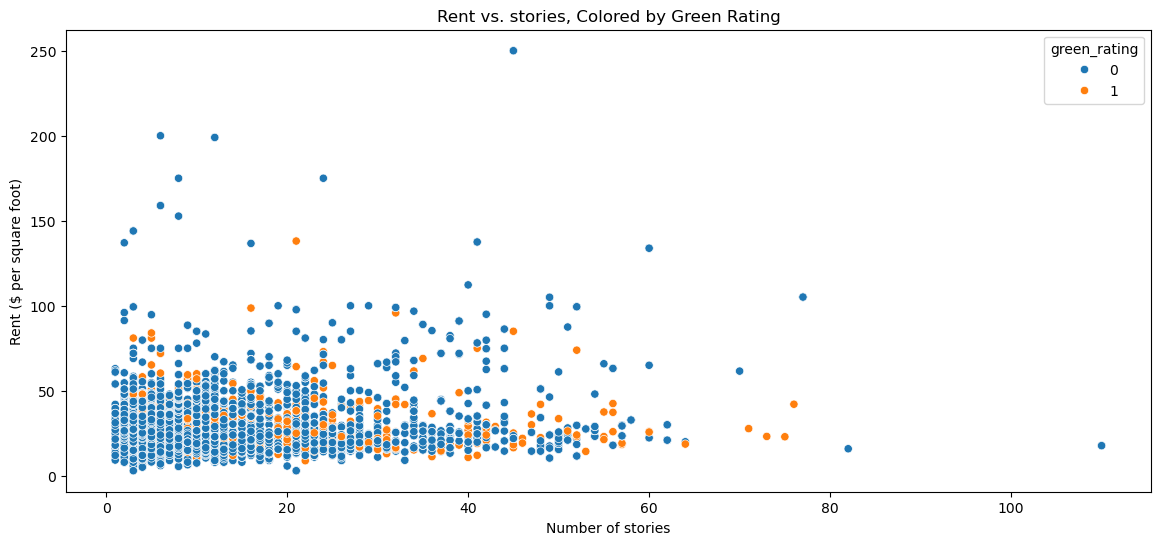

In [73]:
# Relation between stories and Rent along with green rating
plt.figure(figsize=(14, 6))
sns.scatterplot(x='stories', y='Rent', hue='green_rating', data=df_greenbuildings)
plt.title('Rent vs. stories, Colored by Green Rating')
plt.xlabel('Number of stories')
plt.ylabel('Rent ($ per square foot)')
plt.show()

#### There is no evidence of any relationship between Rent and the number of stories in the building

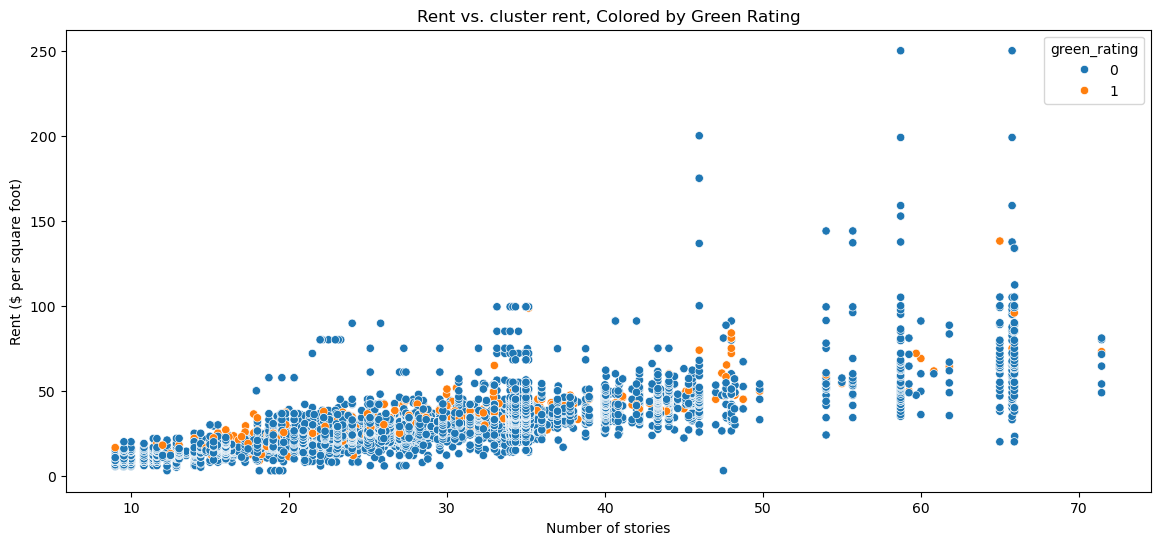

In [105]:
# Relation between stories and cluster Rent along with green rating
plt.figure(figsize=(14, 6))
sns.scatterplot(x='cluster_rent', y='Rent', hue='green_rating', data=df_greenbuildings)
plt.title('Rent vs. cluster rent, Colored by Green Rating')
plt.xlabel('Number of stories')
plt.ylabel('Rent ($ per square foot)')
plt.show()

#### Cluster rent has a slight positive relationship with rent

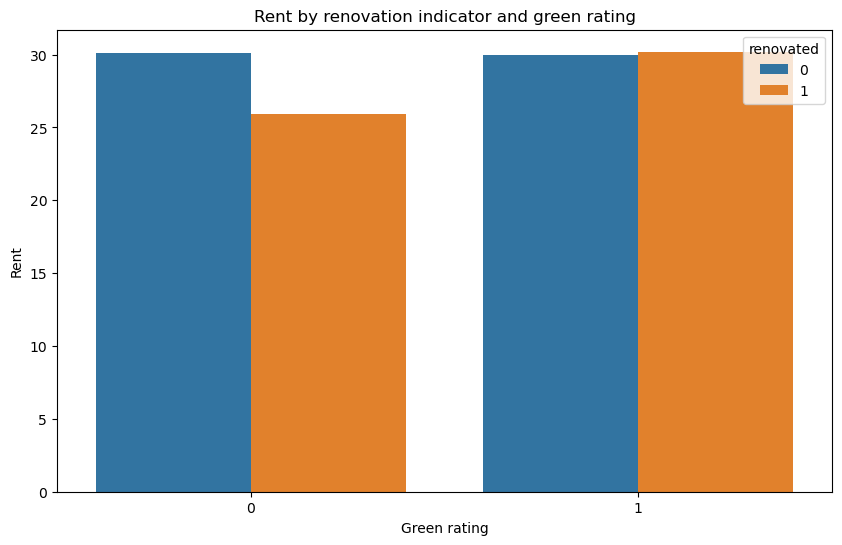

In [98]:
# Renovated
plt.figure(figsize=(10, 6))
sns.barplot(x='green_rating', y='Rent', hue='renovated', data=df_greenbuildings, errorbar=None)
plt.title('Rent by renovation indicator and green rating')
plt.xlabel('Green rating')
plt.ylabel('Rent')
plt.show()

- If the building has undergone significant renovations, the rent tends to be lower for non-green buildings
- But the rent remains the same if the building is green

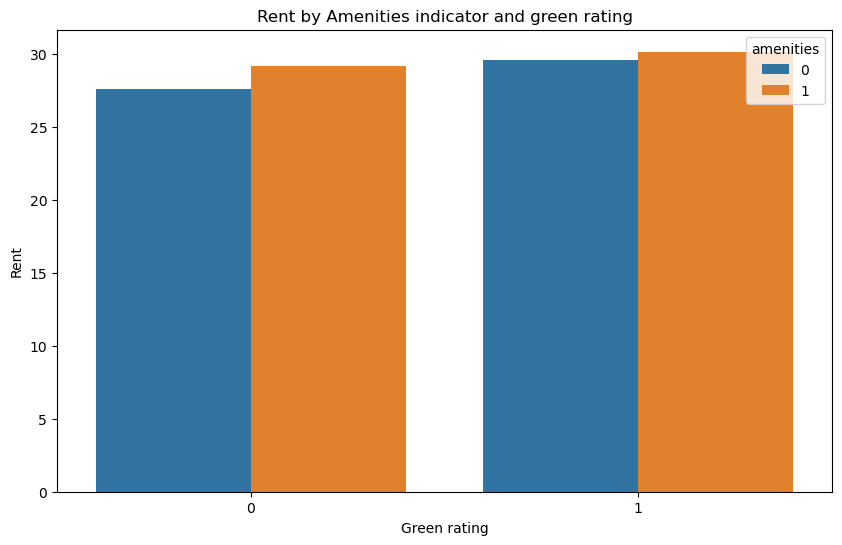

In [97]:
# Amenities
plt.figure(figsize=(10, 6))
sns.barplot(x='green_rating', y='Rent', hue='amenities', data=df_greenbuildings, errorbar=None)
plt.title('Rent by Amenities indicator and green rating')
plt.xlabel('Green rating')
plt.ylabel('Rent')
plt.show()

#### Buildings with amenities attract slightly higher rent irrespective of green rating

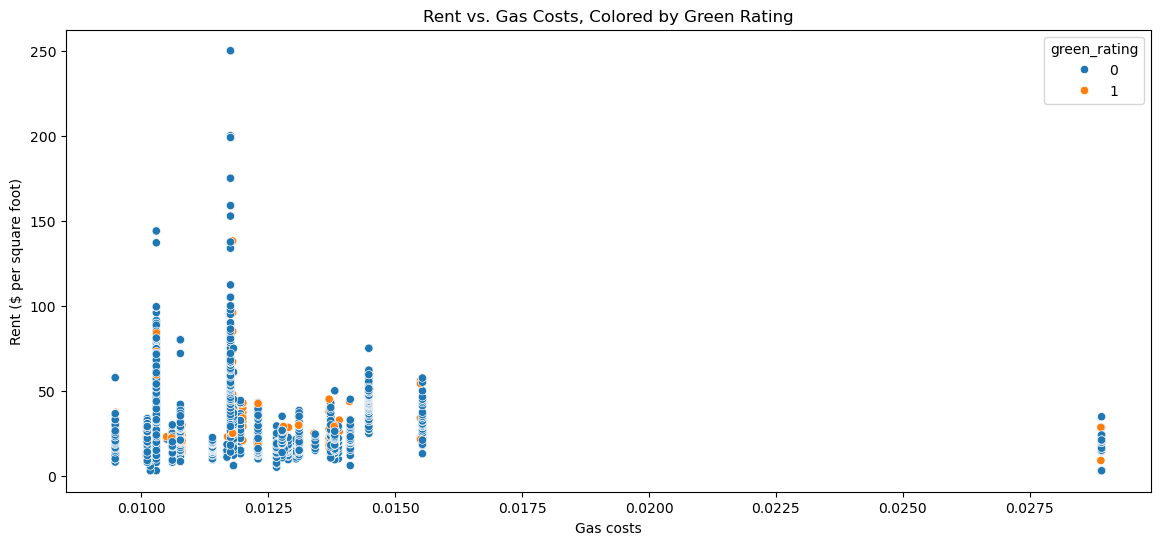

In [83]:
# Gas Costs
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Gas_Costs', y='Rent', hue='green_rating', data=df_greenbuildings)
plt.title('Rent vs. Gas Costs, Colored by Green Rating')
plt.xlabel('Gas costs')
plt.ylabel('Rent ($ per square foot)')
plt.show()

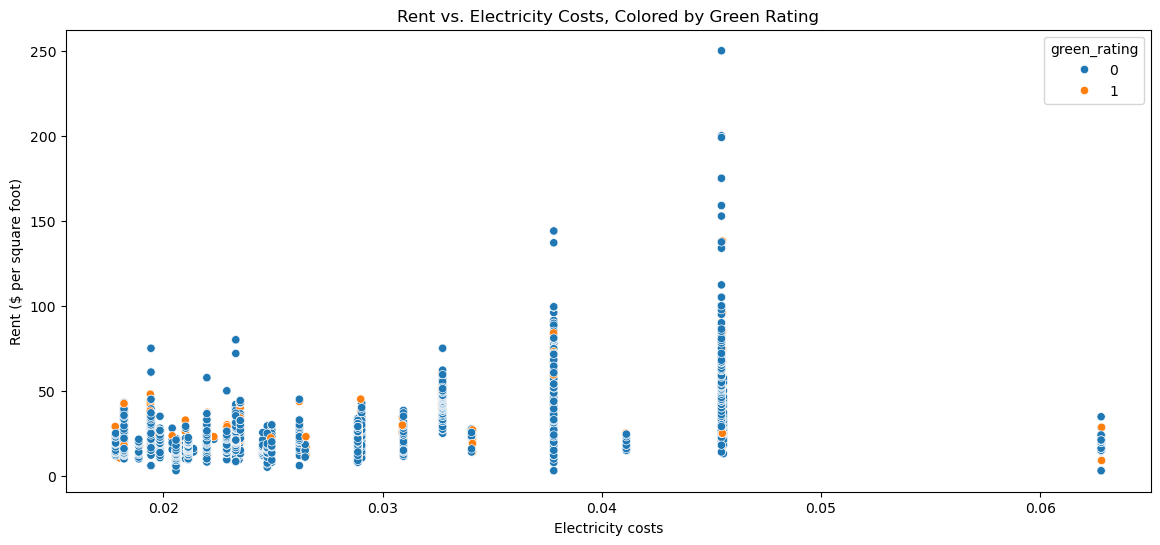

In [84]:
# Electricity Costs
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Electricity_Costs', y='Rent', hue='green_rating', data=df_greenbuildings)
plt.title('Rent vs. Electricity Costs, Colored by Green Rating')
plt.xlabel('Electricity costs')
plt.ylabel('Rent ($ per square foot)')
plt.show()

- Electricity costs has a positive relation with Rent while gas costs has a slightly negative relationship with Rent

## Summary
****
- The initial insights from Statsguru were suggesting that Rent of the building was purely driven by the green rating.
- It is true that the median income is $2.60 higher for green buildings 
- Based on the visual exploratory analysis considering other variables provided in the dataset, there is evidence that the Rent of the building is impacted by a lot more factors. Below are the key takeaways
  - Quality of the buildings has an impact on the Rent. High-quality buildings (class A) attract higher rents irrespective of green ratings. Moderate-quality buildings (class B) reduce the rent irrespective of the green rating
  - Buildings with net rental contracts get lower rent since tenants have to pay utilities on their own
  - The higher the occupancy (leasing rate), the more rent the building can attract. Buildings with high occupancy imply high demand which can increase the rents
  - For green buildings, prior renovations don't seem to have any impact on the rent. For non-green buildings, renovations have a negative impact on the rent. These could be old buildings that need more renovations. Old buildings in general get lower rent
  - Cluster rent has a positive relationship with rent but we don't know the cluster of new building
  - Amenities have a slight positive impact on Rent. Buildings with at least one amenity among banks, convenience stores, dry cleaners, restaurants, retail shops, and fitness centers have higher rent than others. Additional amenities increase the attractiveness of a building
  - Electricity costs have a positive impact on rent while Gas costs have a negative impact on rent. Higher electricity costs could be associated with regions or markets where rents are generally higher due to demand. For instance, urban areas with expensive utilities might also have higher property rents
  - The size of the building and the number of stories don't seem to have any significant impact on the Rent of the building
  - In conclusion, though Statsguru's calculations are correct for fixed costs he has not considered variable costs. Constructing a building class A or having amenities drives rent high but the information provided is not sufficient to know the cost of constructing a class A or amenities building. 
